In [4]:
import importlib
import auto_regressive_demand
importlib.reload(auto_regressive_demand)
import auto_regressive_demand as ard
from op import number_aircrafts_lp
import pandas as pd

In [5]:
schedule = ard.UAM_Schedule('/LAX_ind.csv', '/T_F41SCHEDULE_B43.csv')
month = 3
day = 2
alpha = 0.6
empty = pd.DataFrame()
for i in range(10):
    one_day = schedule.get_one_day(month, day, alpha)
    one_day['index'] = i
    empty = pd.concat([empty, one_day])

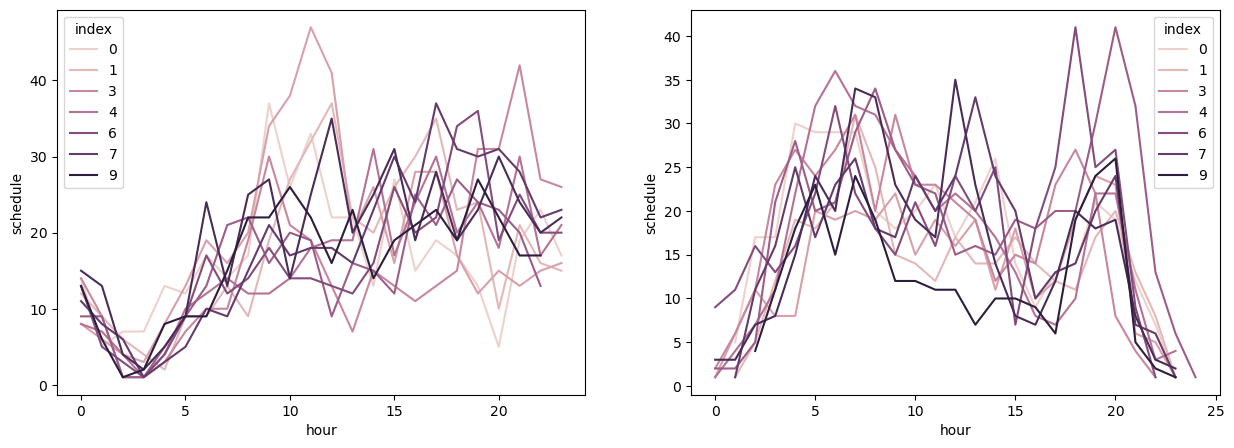

In [21]:
empty['hour'] = empty['schedule']//60
all = empty.groupby(['hour','od','index']).count().reset_index()
import seaborn as sns

all1 = all[all['od'] == 'LAX_DTLA']
all2 = all[all['od'] == 'DTLA_LAX']
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

sns.lineplot(data=all1, x='hour', y='schedule', hue='index', ax=ax[0])
sns.lineplot(data=all2, x='hour', y='schedule', hue='index', ax=ax[1])

plt.show()

In [46]:
empty['hour'] = empty['schedule']//60
empty.sort_values(by=['hour','od', 'index'], ascending=False)

,schedule,od,index,hour,time_bins
872,1464.506691,DTLA_LAX,8,24.0,NaN
873,1499.390113,DTLA_LAX,8,24.0,NaN
874,1483.778400,DTLA_LAX,8,24.0,NaN
875,1449.264645,DTLA_LAX,8,24.0,NaN
736,1499.018784,DTLA_LAX,6,24.0,NaN
...,...,...,...,...,...
387,47.310798,DTLA_LAX,4,0.0,"[45.0, 50.0)"
435,38.341778,DTLA_LAX,2,0.0,"[35.0, 40.0)"
388,16.899282,DTLA_LAX,1,0.0,"[15.0, 20.0)"
404,8.266361,DTLA_LAX,0,0.0,"[5.0, 10.0)"


In [79]:
fleetsize = []
for month in range(1, 13):
    for day in range(1, 32):
        if (month == 2 and day > 28) or ((month in [4, 6, 9, 11]) and day > 30):
            continue  # Skip invalid date

        with open(f'../output/demand_variation/results/{month}_{day}_{6}_fleetsize.txt'.format(month, day), 'r') as f:
            fleetsize.append(int(float(re.search(r'\d+(\.\d+)?', f.readline())[0])))


FileNotFoundError: [Errno 2] No such file or directory: '../output/demand_variation/results/10_15_6_fleetsize.txt'

In [81]:
fleetsize = np.array(fleetsize)

<Axes: >

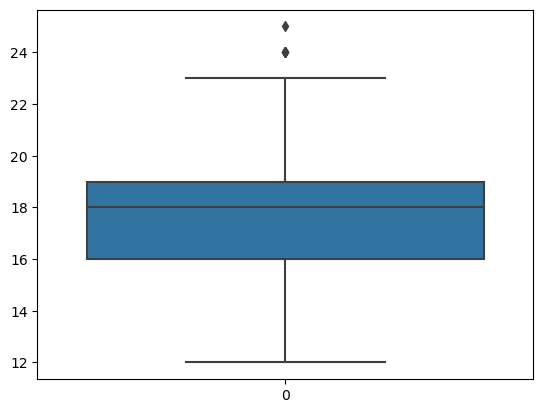

In [85]:
sns.boxplot(data=fleetsize)

In [6]:
import os

directory_path = "../output/demand_variation/schedule"  # Replace with the path to your directory

# List all files in the directory
file_list = os.listdir(directory_path)

# Iterate through the files and delete those ending with "7"
for filename in file_list:
    if filename.endswith("7.csv"):
        file_path = os.path.join(directory_path, filename)
        os.remove(file_path)
        print(f"Deleted: {filename}")


Deleted: 1_8_7.csv
Deleted: 3_31_7.csv
Deleted: 1_10_7.csv
Deleted: 7_1_7.csv
Deleted: 1_6_7.csv
Deleted: 1_4_7.csv
Deleted: 1_11_7.csv
Deleted: 1_13_7.csv
Deleted: 1_12_7.csv
Deleted: 10_2_7.csv
Deleted: 1_1_7.csv
Deleted: 1_7_7.csv
Deleted: 1_9_7.csv
Deleted: 10_1_7.csv
Deleted: 1_3_7.csv
Deleted: 1_5_7.csv
Deleted: 1_2_7.csv


In [7]:
file_list 

['3_24_6',
 '1_7_6',
 '5_13_6',
 '2_16_6',
 '1_27_6',
 '6_12_6',
 '6_23_6',
 '8_8_6',
 '7_20_6',
 '6_13_6',
 '5_20_6',
 '3_1_6',
 '7_18_6',
 '3_6_6',
 '4_13_6',
 '6_16_6',
 '1_8_7.csv',
 '6_14_6',
 '5_30_6',
 '7_15_6',
 '5_28_6',
 '2_24_6',
 '10_14_6',
 '2_6_6',
 '5_26_6',
 '5_21_6',
 '8_25_6',
 '2_2_6',
 '8_26_6',
 '9_30_6',
 '7_19_6',
 '10_13_6',
 '7_22_6',
 '9_25_6',
 '9_16_6',
 '4_12_6',
 '5_9_6',
 '4_17_6',
 '8_29_6',
 '4_19_6',
 '5_11_6',
 '5_23_6',
 '8_15_6',
 '7_21_6',
 '5_7_6',
 '2_15_6',
 '5_5_6',
 '4_6_6',
 '6_30_6',
 '10_4_6',
 '4_29_6',
 '5_8_6',
 '7_31_6',
 '2_1_6',
 '1_24_6',
 '6_8_6',
 '3_31_7.csv',
 '3_10_6',
 '8_4_6',
 '3_20_6',
 '8_2_6',
 '7_23_6',
 '1_10_7.csv',
 '5_31_6',
 '2_21_6',
 '4_1_6',
 '7_6_6',
 '7_1_7.csv',
 '5_27_6',
 '4_15_6',
 '10_5_6',
 '9_12_6',
 '5_29_6',
 '5_25_6',
 '6_17_6',
 '2_20_6',
 '7_17_6',
 '10_1_6',
 '8_20_6',
 '5_14_6',
 '7_14_6',
 '2_19_6',
 '1_15_6',
 '3_5_6',
 '4_26_6',
 '4_23_6',
 '4_24_6',
 '10_6_6',
 '3_18_6',
 '6_7_6',
 '1_6_7.csv',